In [1]:
# Demo-ing each of the data downloads
# Note: I've predownloaded all of these datasets to NCI (except roads atm), so I shouldn't need to wait for these API calls when scaling up

In [2]:
# Worldcover download
from shelterbelts.apis.worldcover import worldcover, visualise_categories, worldcover_cmap, worldcover_labels

outdir = '../outdir'
stub = 'api_downloads'

lat = -34.37825
lon = 148.42490
buffer = 0.012   # In degrees in a single direction. For example, 0.01 degrees is about 1km so it would give a 2kmx2km area.

In [3]:
%%time
ds_worldcover = worldcover(lat, lon, buffer, outdir, stub)

Starting worldcover.py
Saved: ../outdir/api_downloads_worldcover.tif
Saved: ../outdir/api_downloads_worldcover.png
CPU times: user 628 ms, sys: 76.1 ms, total: 704 ms
Wall time: 7.83 s


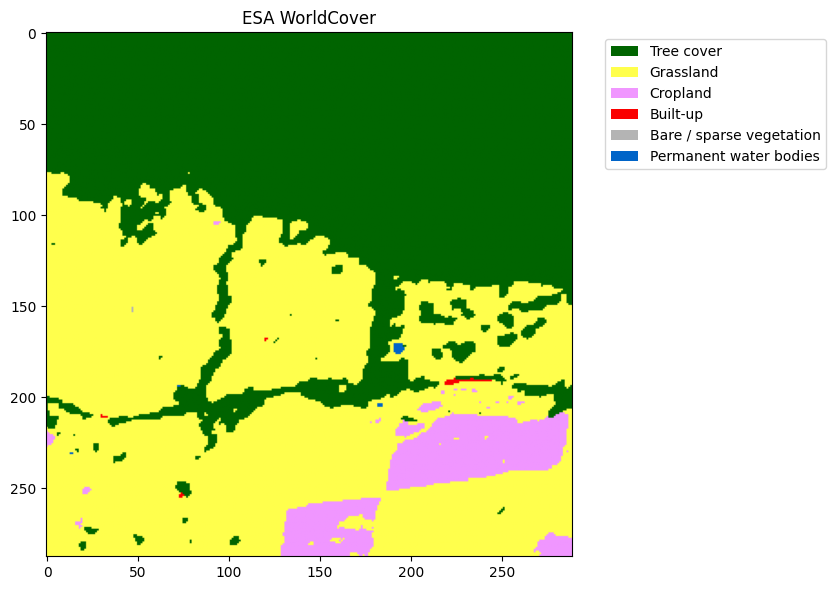

In [4]:
visualise_categories(ds_worldcover['worldcover'], None, worldcover_cmap, worldcover_labels, "ESA WorldCover")

In [5]:
# Tolan canopy height download
from shelterbelts.apis.canopy_height import canopy_height, visualise_canopy_height
tmpdir = '../tmpdir'

In [6]:
%%time
ds_tolan = canopy_height(lat, lon, buffer, outdir, stub, tmpdir)

Saved: ../outdir/api_downloads_canopy_height.tif
Saved: ../outdir/api_downloads_canopy_height.png
CPU times: user 13.7 s, sys: 639 ms, total: 14.4 s
Wall time: 14.6 s


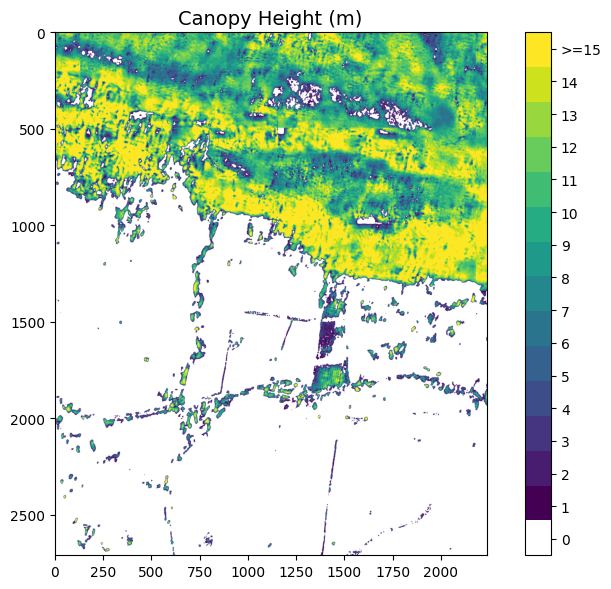

In [7]:
visualise_canopy_height(ds_tolan)

In [8]:
# Converting to tree vs no tree
from shelterbelts.util.binary_trees import worldcover_trees, canopy_height_trees, cmap_woody_veg, labels_woody_veg
da_worldcover_trees = worldcover_trees('../outdir/api_downloads_worldcover.tif', outdir)
da_canopy_height_trees = canopy_height_trees('../outdir/api_downloads_canopy_height.tif', outdir)

Saved: ../outdir/api_downloads_worldcover_woody_veg.tif
Saved: ../outdir/api_downloads_canopy_height_woody_veg.tif


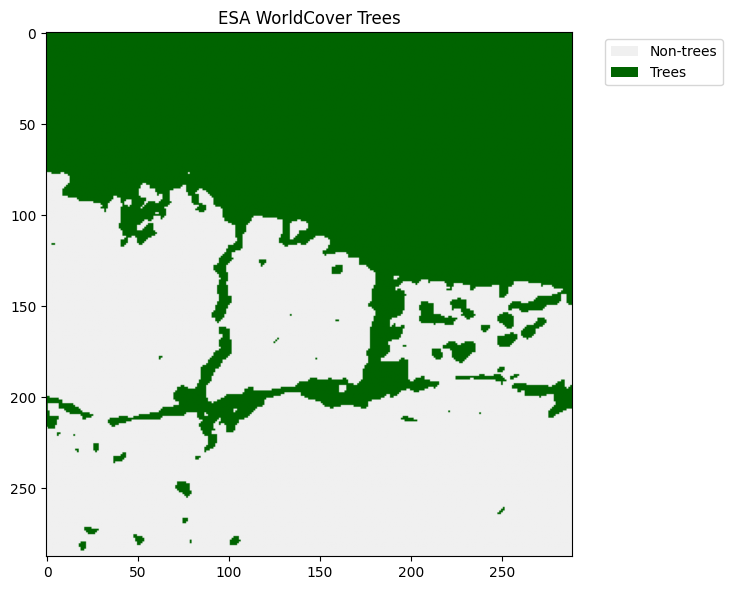

In [9]:
visualise_categories(da_worldcover_trees, None, cmap_woody_veg, labels_woody_veg, "ESA WorldCover Trees")

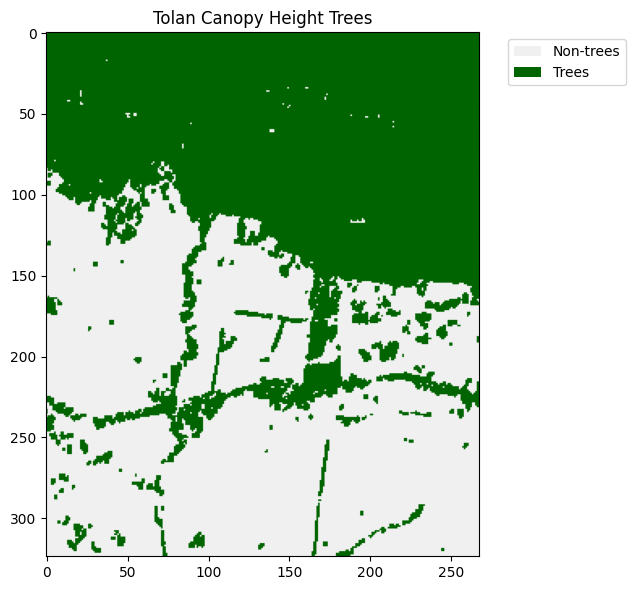

In [10]:
visualise_categories(da_canopy_height_trees, None, cmap_woody_veg, labels_woody_veg, "Tolan Canopy Height Trees")

In [11]:
# BARRA wind download
from shelterbelts.apis.barra_daily import barra_daily, wind_rose
variables = ["uas", "vas"]
start_year = 2020 
end_year = 2021

In [12]:
%%time
ds_wind = barra_daily(variables, lat, lon, buffer, start_year, end_year, outdir, stub)

Saved: ../outdir/api_downloads_barra_daily.nc
Saved ../outdir/api_downloads_barra_daily.png
CPU times: user 2.44 s, sys: 493 ms, total: 2.93 s
Wall time: 38.6 s


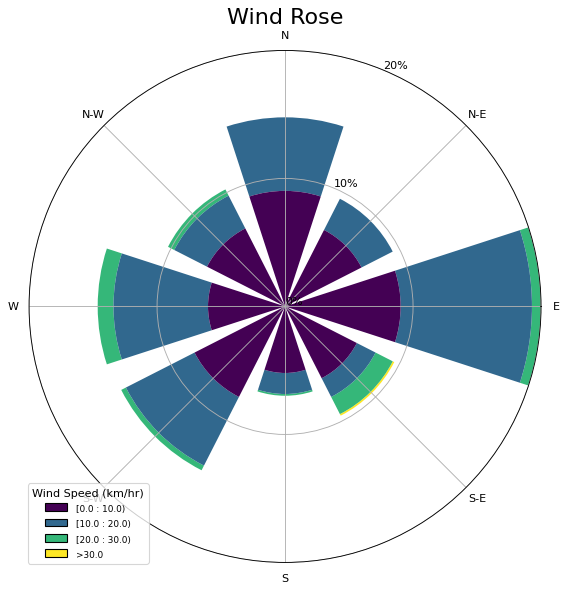

In [13]:
wind_rose(ds_wind)

In [14]:
# Open Street Map Roads
from shelterbelts.apis.osm import osm_roads, roads_cmap, roads_labels

In [15]:
%%time
geotif = '../outdir/api_downloads_worldcover.tif'
gdf, ds = osm_roads(geotif, outdir, stub)

Saved: ../outdir/api_downloads_roads.gpkg
Saved: ../outdir/api_downloads_roads.tif
CPU times: user 158 ms, sys: 23.5 ms, total: 181 ms
Wall time: 195 ms


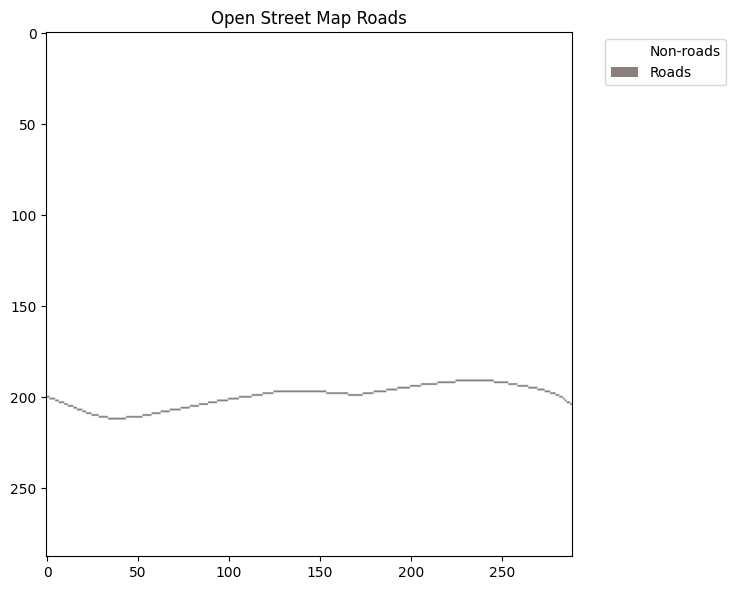

In [16]:
visualise_categories(ds['roads'], None, roads_cmap, roads_labels, "Open Street Map Roads")

In [17]:
# Catchments
from shelterbelts.apis.catchments import catchments, plot_catchments, gullies_cmap
filename_5m = "../data/Young201702-PHO3-AHD_6306194_55_0002_0002_5m.tif"   # Downloaded from here: https://portal.spatial.nsw.gov.au/portal/apps/webappviewer/index.html?id=437c0697e6524d8ebf10ad0d915bc219
ds_catchments = catchments(filename_5m, outdir, stub, num_catchments=10)

Saved as float64:  ./api_downloads_terrain.tif
Saved: ../outdir/api_downloads_gullies.tif
Saved: ../outdir/api_downloads_ridges.tif
Saved: ../outdir/api_downloads_gullies_and_ridges.png


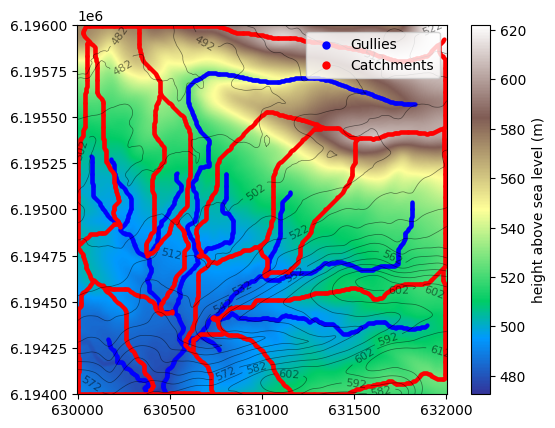

In [18]:
plot_catchments(ds_catchments)

In [19]:
# Hydrolines
from shelterbelts.apis.hydrolines import hydrolines
hydrolines_gpkg = "../data/g2_26729_hydrolines_cropped.gpkg"  # Downloaded from here https://researchdata.edu.au/surface-hydrology-lines-regional/3409155 (and then cropped with the function below)
gdf_hydrolines, ds_hydrolines = hydrolines(geotif, hydrolines_gpkg, outdir, stub)

Saved ../outdir/api_downloads_hydrolines_cropped.gpkg
Saved: ../outdir/api_downloads_hydrolines.tif


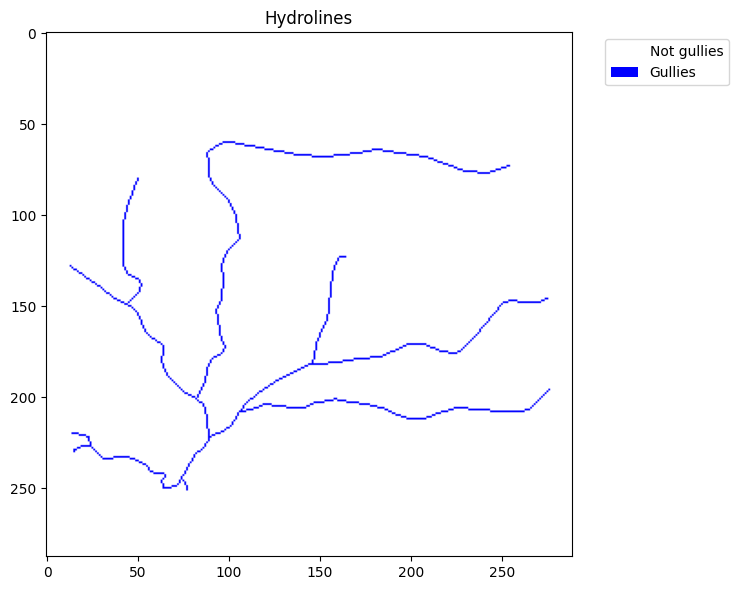

In [20]:
visualise_categories(ds_hydrolines['gullies'], None, gullies_cmap, {0:'Not gullies', 1:'Gullies'}, "Hydrolines")